In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from htmresearch.support.gridcells.mdist.utils import *
%load_ext autoreload
%autoreload 2


m = 6
k = 6
S = np.sqrt(2)**np.arange(m)
B = create_module_basis(m, k, S)
# A = create_action_tensor(B)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
A = np.zeros((m,2,k))
for i, s in enumerate(S):
    for l in xrange(k):
        a  = np.random.randn(2)
        a /= np.linalg.norm(a)
        A[i,:,l] = a / s

        

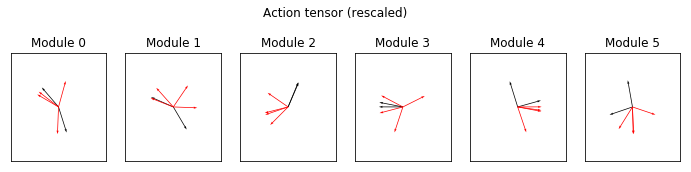

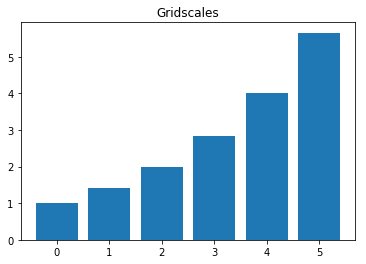

In [25]:
fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
plt.suptitle("Action tensor (rescaled)", y=1.2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

for i in range(m):
    ax[i].set_title("Module {}".format(i))
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    r1 = A[i,0,:] * S[i]
    r2 = A[i,1,:] * S[i]

    ax[i].quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)
    for l in range(2,k):
        ax[i].quiver(0.0,0.0,r1[l],r2[l], angles='xy', scale_units='xy', scale=1, color="red")

plt.show()



fig, ax = plt.subplots(1, 1);
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=None)

ax.set_title("Gridscales")
ax.bar(range(m), S)

plt.show()